In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras.datasets import reuters
from keras.utils import to_categorical
from keras.datasets import boston_housing
from keras import regularizers

2024-11-16 13:04:07.096096: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=4000)

In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [4]:
def vectorize_sequences(sequences, dimension=4000):
    results = np.zeros((len(sequences), dimension), dtype='int')
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# one_hot - кодировка
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

/home/eugene/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3469 - loss: 3.2370 - val_accuracy: 0.5820 - val_loss: 1.8669
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6376 - loss: 1.6943 - val_accuracy: 0.6710 - val_loss: 1.4189
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7231 - loss: 1.2793 - val_accuracy: 0.7200 - val_loss: 1.2389
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7652 - loss: 1.0711 - val_accuracy: 0.7480 - val_loss: 1.1117
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8001 - loss: 0.9213 - val_accuracy: 0.7690 - val_loss: 1.0375
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8220 - loss: 0.7931 - val_accuracy: 0.7680 - val_loss: 0.9916
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8518 - loss: 0.6873 - val_accuracy: 0.7770 - val_loss: 0.9567
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8728 - loss: 0.5801 - val_accuracy: 0.8000 - val_loss: 0.9114

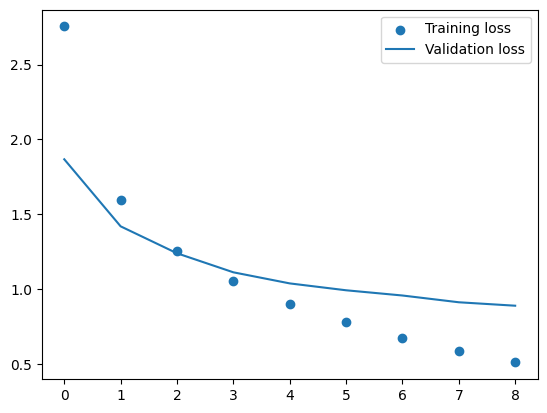

In [5]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(4000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partical_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partical_y_train = one_hot_train_labels[1000:]

history = model.fit(partical_x_train, partical_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = history.epoch

plt.scatter(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()

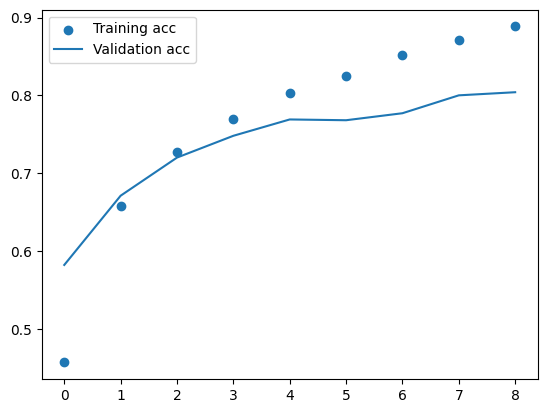

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.scatter(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.legend()

In [7]:
test_loss, test_acc = model.evaluate(x_test, one_hot_test_labels)
print(f'{test_acc=}')

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7933 - loss: 0.9294
test_acc=0.7867319583892822


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3664 - loss: 3.2210 - val_accuracy: 0.6070 - val_loss: 1.8611
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6493 - loss: 1.6901 - val_accuracy: 0.6790 - val_loss: 1.4042
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7251 - loss: 1.2716 - val_accuracy: 0.7320 - val_loss: 1.2193
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7767 - loss: 1.0356 - val_accuracy: 0.7500 - val_loss: 1.1027
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8102 - loss: 0.8761 - val_accuracy: 0.7540 - val_loss: 1.0496
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8288 - loss: 0.7584 - val_accuracy: 0.7760 - val_loss: 0.9794
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8530 - loss: 0.6558 - val_accuracy: 0.7960 - val_loss: 0.9474
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8712 - loss: 0.5855 - val_accuracy: 0.7910 - val_loss: 0.9041

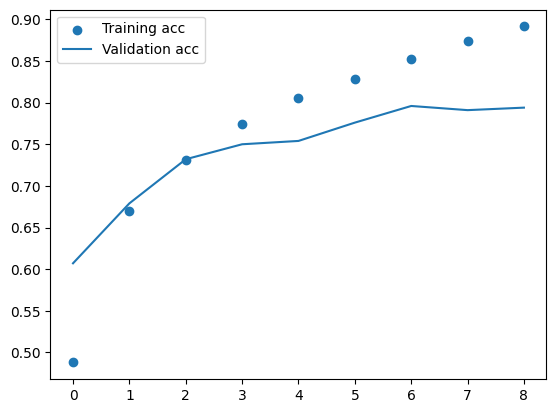

In [8]:
# выходы не кодируем в состояние one_hot

y_train = np.array(train_labels)
y_test = np.array(test_labels)

y_val = y_train[:1000]
partical_y_train = y_train[1000:]

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(4000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(partical_x_train, partical_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))

epochs = history.epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.scatter(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.legend()

In [9]:
def batchNorm(train_data, test_data):
    
    train = np.copy(train_data)
    test = np.copy(test_data)
    
    mean = train.mean(axis=0)
    train -= mean
    std = train.std(axis=0)
    train /= std

    test -= mean
    test /= std

    return (train, test)


def build_model():
    model = models.Sequential()
    
    model.add(layers.Dense(64, activation='relu', input_shape=(13, )))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

In [14]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=4000)

In [15]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and ? operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# one_hot - кодировка
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4003 - loss: 3.3854 - val_accuracy: 0.5950 - val_loss: 2.0654
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6351 - loss: 1.8832 - val_accuracy: 0.6800 - val_loss: 1.6102
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7140 - loss: 1.4657 - val_accuracy: 0.7250 - val_loss: 1.4037
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7646 - loss: 1.2718 - val_accuracy: 0.7500 - val_loss: 1.2861
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8014 - loss: 1.1077 - val_accuracy: 0.7630 - val_loss: 1.2222
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8204 - loss: 1.0131 - val_accuracy: 0.7800 - val_loss: 1.1683
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8440 - loss: 0.9228 - val_accuracy: 0.7920 - val_loss: 1.1355
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8632 - loss: 0.8220 - val_accuracy: 0.7990 - v

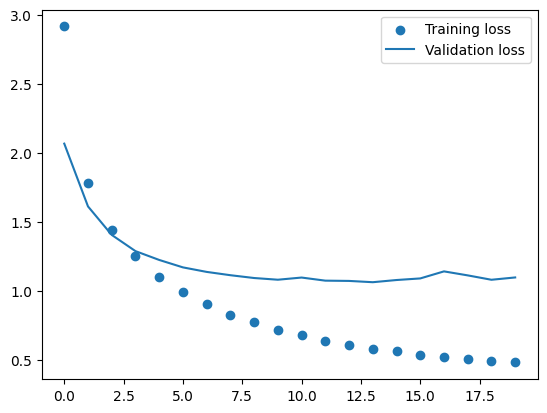

In [17]:
model = models.Sequential()
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(4000, ))) # Добавление Регуляризации
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

x_val = x_train[:1000]
partical_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partical_y_train = one_hot_train_labels[1000:]

history = model.fit(partical_x_train, partical_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = history.epoch

plt.scatter(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.legend()

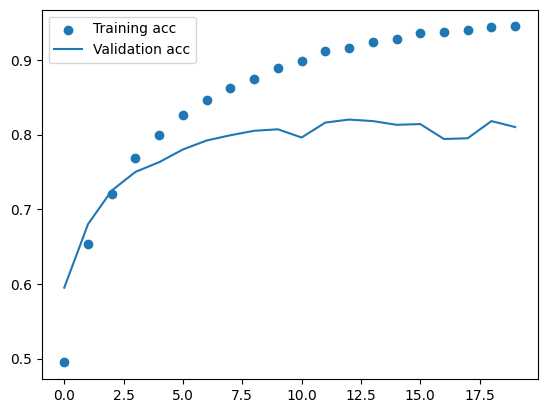

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.scatter(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.legend()